In [903]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors


In [904]:
df = pd.read_csv("Mall_Customers.csv")

In [905]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [907]:
df.columns[df.isnull().any()]

Index([], dtype='object')

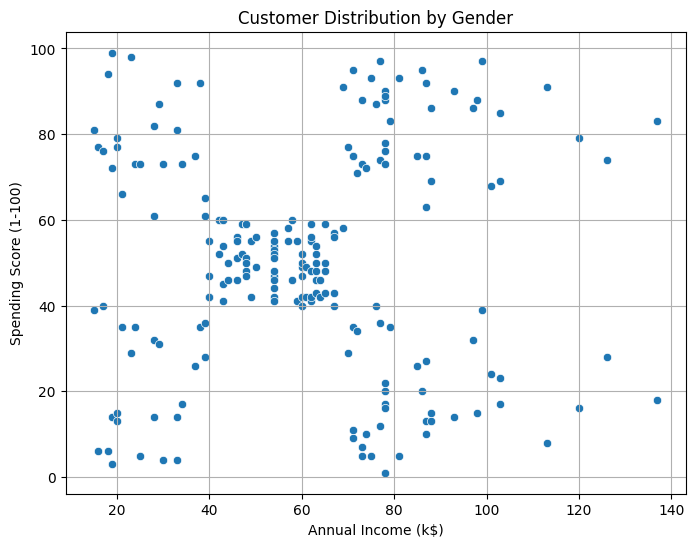

In [908]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Customer Distribution by Gender')
plt.grid(True)
plt.show()


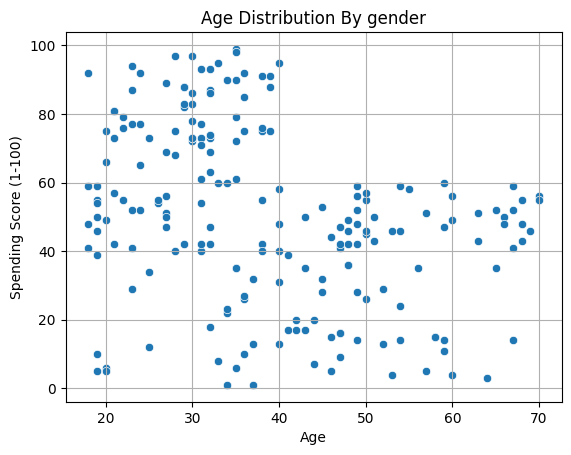

In [909]:
plt.Figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')
plt.title('Age Distribution By gender')
plt.grid(True)
plt.show()

In [910]:
df = df.drop('CustomerID', axis=1)

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})



In [911]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

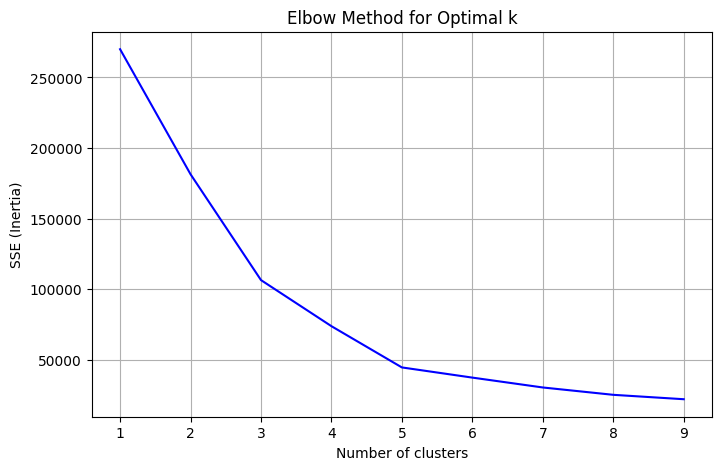

In [912]:
inertia = []
k_range = range(1, 10)

for i in k_range:
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, color='blue')


plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [913]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(x_scaled)



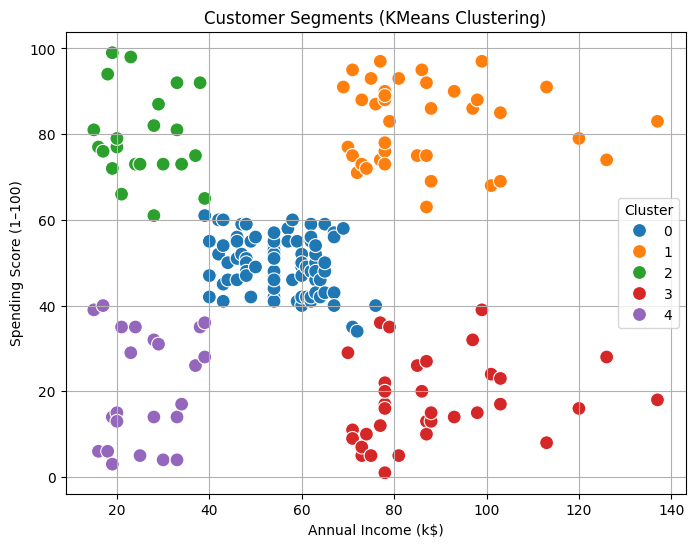

In [914]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Cluster',
                palette='tab10',
                s=100)
plt.title('Customer Segments (KMeans Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


In [915]:
for cluster_id, group in cluster_summary.iterrows():
    print(f"Cluster {cluster_id}:")
    print(f" - Avg Income: ${group['Annual Income (k$)']}k")
    print(f" - Avg Spending Score: {group['Spending Score (1-100)']}")
    print(f" - Customer Count: {group['Count']}")
    print("-" * 40)


Cluster 0:
 - Avg Income: $55.3k
 - Avg Spending Score: 49.5
 - Customer Count: 81.0
----------------------------------------
Cluster 1:
 - Avg Income: $86.5k
 - Avg Spending Score: 82.1
 - Customer Count: 39.0
----------------------------------------
Cluster 2:
 - Avg Income: $25.7k
 - Avg Spending Score: 79.4
 - Customer Count: 22.0
----------------------------------------
Cluster 3:
 - Avg Income: $88.2k
 - Avg Spending Score: 17.1
 - Customer Count: 35.0
----------------------------------------
Cluster 4:
 - Avg Income: $26.3k
 - Avg Spending Score: 20.9
 - Customer Count: 23.0
----------------------------------------


In [916]:
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]
cluster_3 = df[df['Cluster'] == 3]
cluster_4 = df[df['Cluster'] == 4]

clusters = {
    "Mainstream": cluster_0,
    "High-Value": cluster_1,
    "Impulsive Spenders": cluster_2,
    "Cautious Spenders": cluster_3,
    "Low Engagement": cluster_4
}


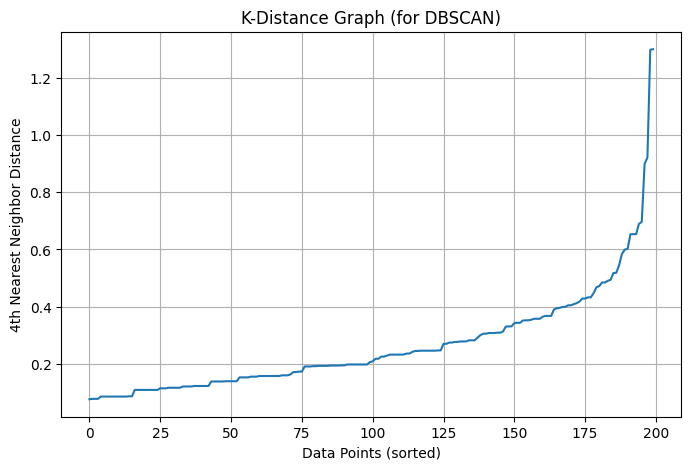

In [917]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(X)


neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)


distance_dec = np.sort(distances[:, 4])

plt.figure(figsize=(8, 5))
plt.plot(distance_dec)
plt.title("K-Distance Graph (for DBSCAN)")
plt.xlabel("Data Points (sorted)")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


In [918]:
dbscan = DBSCAN(eps=0.4, min_samples=4)
df['DBSCAN_Cluster'] = dbscan.fit_predict(x_scaled)


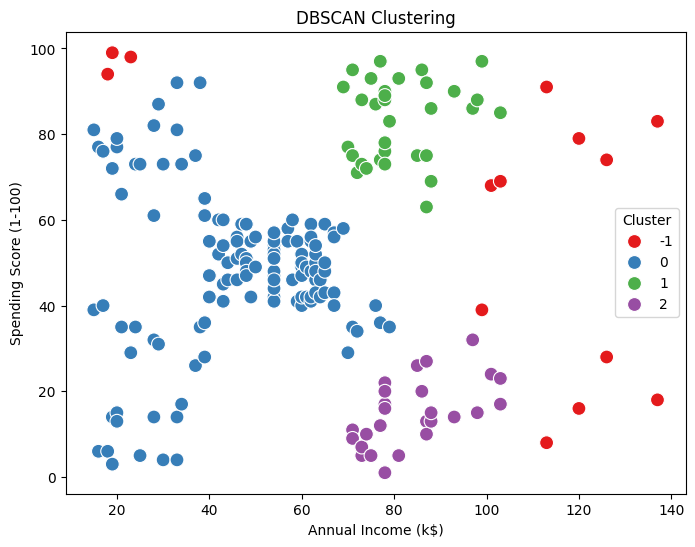

In [919]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='Set1',
    data=df,
    s=100
)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


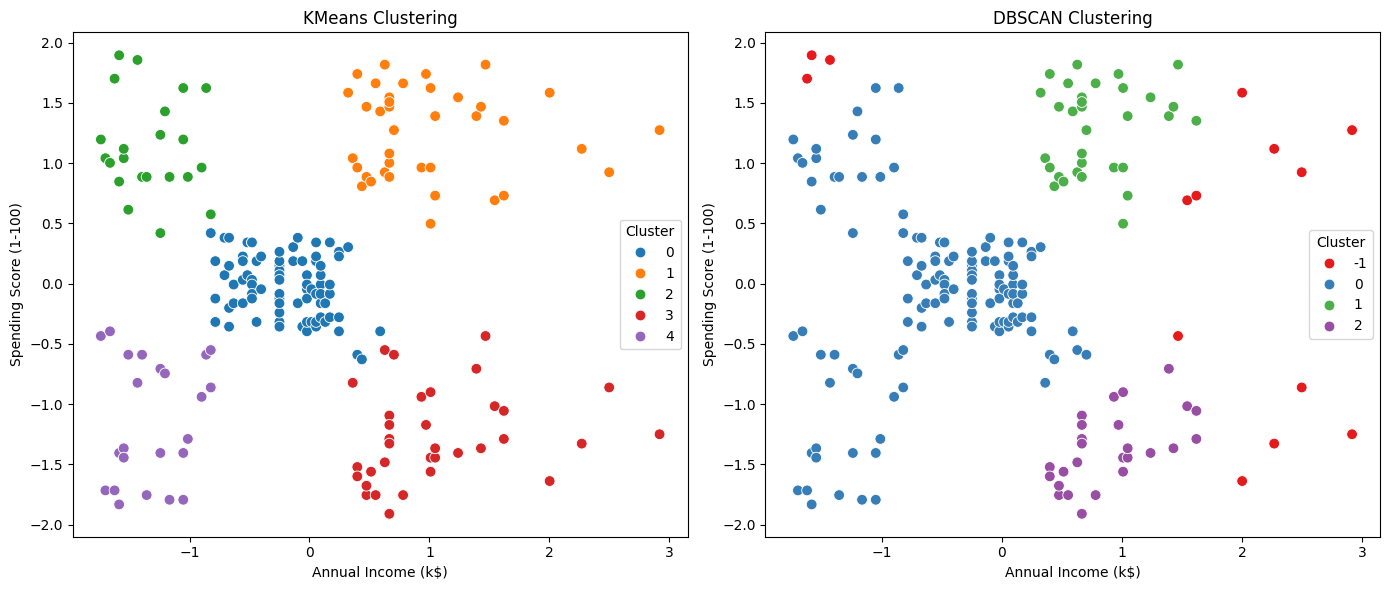

In [920]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=df['Cluster'], palette='tab10', ax=axs[0], s=60
)
axs[0].set_title('KMeans Clustering')
axs[0].set_xlabel('Annual Income (k$)')
axs[0].set_ylabel('Spending Score (1-100)')
axs[0].legend(title='Cluster')

sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=df['DBSCAN_Cluster'], palette='Set1', ax=axs[1], s=60
)
axs[1].set_title('DBSCAN Clustering')
axs[1].set_xlabel('Annual Income (k$)')
axs[1].set_ylabel('Spending Score (1-100)')
axs[1].legend(title='Cluster')

plt.tight_layout()
plt.show()
